> Note: Please read Question 17 at the end of this document carefully before you start your work. You will need to provide a detailed discussion of how you used GenAI for this assignment so make sure to keep notes, create screenshots, etc.

> Note: Please also review the assignment PDF in repo. That document has all the details about what you are expected to do to complete this individual assignment. Good luck!

# Tuango - Targeting Mobile App Messages

Prepare "Tuango: Targeting Mobile App Messages" for class discussion and as an individual assignment and submit the assignment through GitHub. Detailed instructions are available on Canvas (tuango.pdf). See the assignment on Canvas for the "invitation" to get the repo. Once you accepted the invitation, you should see the repo at the page below.

See the assignment on Canvas for the "invitation" to get the repo. When you are done with this individual assignment, save your code and commit and push the results to GitHub. Of course you can commit and push code as often as you like, but only before the due date. View the video linked below to refresh your memory on how to clone and push repos.

<https://youtu.be/w6yzFv44CMc>


Add text motivating your work in Markdown format. Markdown is a simple formatting syntax for authoring HTML. For more details on using markdown go to <http://commonmark.org/help/> for a 10-minute interactive Markdown tutorial

Note that your python code must be fully "reproducible". That is, your code must without errors on my (or the TAs) computer. There are will not be any explicit tests for this assignment to confirm if your answers are (not) correct. However, the system will run your code and it is important to check that there is a green checkmark rather than a red X.

If you get a red X, that means your code did not run without errors and that there are things for you the check and fix. When you are done, submit the link to your repo to Canvas. To help you get started test and roll example available using the command below.

`usethis --name "rsm-mgta455-bbb-test-rollout" --dest "~/Desktop" --url "https://www.dropbox.com/scl/fo/si2at367p43hu6dodjtgb/ALvl7nJfcRDTdMGlFtmkiCE?rlkey=yx5nwcd3bottgw6vc3r9lqte8&dl=1"`

<!-- dropbox links updated 2025 -->

This is an individual assignment. As a reminder, it is an honor code violation to share any assignment or exam solution from this class with another student in a current class or a future class generation. This includes using cloud storage like Google Drive. It is also an honor code violation to obtain assignments or exams from a student in another current class or a past class generation for use as an aid in solving problems to be turned in and  graded. Please respect the honor code as it helps to maintain parity in the classroom. Any suspected violation will be reported to the Academic Integrity Office for review.

## Setup

Please complete this python notebook by answering the questions 1-16 in `tuango-msba.pdf`. The code blocks below will load a few python modules you will need and also the data you will need for this first notebook.

> Hint: Make sure to study the reading on [Applied Logistic Regression](https://www.dropbox.com/scl/fi/0t6yqd3oi6zycm47p1srx/applied-logistic-regression-pyrsm.ipynb?rlkey=6q0mfcvba4vn92ty1hfi65m2j&dl=1) which has examples on how to run logistic regression models using the pyrsm package

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyrsm as rsm
import seaborn as sns

# you can import additional python packages but only use packages that
# are already part of the docker container

In [297]:
# Use this dataset and notebook to answer questions 1-13
tuango = pd.read_parquet("data/tuango_pre.parquet")

In [298]:
# feel free to use polars instead of pandas if you prefer
# but you will need to adjust some of the sample code below
# to make it work
# tuango = pl.read_parquet("data/tuango_pre.parquet")

In [299]:
# dataset description
tuango_description = rsm.md("data/tuango_pre_description.md")

# Tuango: Targeting Mobile App Push Messages

This file contains information about the test and does not have results about the roll-out. Values for `buyer` and `ordersize` are missing for all customers that were not part of the test.

## Variable Names and Descriptions
* userid: Unique user ID

**Response to the customized push message**
* buyer: Did the customer buy the Karaoke deal? ("yes" or "no")
* ordersize: Number of 30-minute Karaoke sessions the customer purchased

**Recency, Frequency, and Monetary variables**
* recency: Days since last purchase of a deal (before the Karaoke deal offer)
* frequency: Number of deals purchased during the one year period before the Karaoke deal offer
* monetary: Average amount spent per order (in RMB) during the one year period before the Karaoke deal offer

**Other variables in the dataset**
* age: Age of the customer
* gender: Gender identity of the customer (M = male, F = female, O = Other or unknown)
* music: Customer made a purchase in the music category during the one-year period before the Karaoke deal offer ("no" or "yes")
* test: Splits the dataset into test (1) and rollout (0) data
* training: Splits the dataset into training (1) and test (0) data. This variable will not be used in this assignment

In [300]:
# you will likely find the below useful in this assignment
# there are missing values in the data that you will need to deal with
# why do you think there missing values?
# do you think there are data quality issues?
# or is there a simpler explanation?
tuango.buyer.value_counts(dropna=False)

buyer
NaN    397252
no      18888
yes      2020
Name: count, dtype: int64

In [301]:
# you will likely find the below useful in this assignment
tuango.buyer.isna().value_counts()

buyer
True     397252
False     20908
Name: count, dtype: int64

In [302]:
# create a variable called 'buyer_yes' that has value 1 when buyer == 'yes', has value 0 when buyer == 'no' and has value np.nan when buyer.isna() is True
tuango["buyer_yes"] = tuango["buyer"].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else np.nan))

# you can check that you have this set up correctly using the command below
tuango.buyer_yes.value_counts(dropna=False)

buyer_yes
NaN    397252
0       18888
1        2020
Name: count, dtype: int64

In [303]:
tuango.head()

,userid,buyer,ordersize,recency,frequency,monetary,age,gender,music,training,test,buyer_yes
0,U15889344,no,0.0,309,7.0,39.799999,44,F,yes,0.0,1,0
1,U60246497,no,0.0,297,8.0,39.799999,80,M,yes,1.0,1,0
2,U22965759,no,0.0,295,1.0,72.900002,59,F,yes,1.0,1,0
3,U40811142,no,0.0,277,1.0,40.000000,37,F,yes,0.0,1,0
4,U76283952,no,0.0,259,1.0,21.000000,43,F,yes,1.0,1,0


## Part I:  Preliminary Analysis

### Question 1

What proportion of customers responded to the deal offer message (i.e., bought the deal)?

In [304]:
# insert calculation code here
# the result should be expressed as a proportion/decimal
# assign the calculated number to "q1"
# there is no need to round the result

total_responses = tuango["buyer"].notna().sum()

# Number of "yes" responses
yes_responses = (tuango["buyer"] == "yes").sum()

# Proportion of buyers
q1 = yes_responses / total_responses

# The result is stored in q1
q1

0.09661373636885402

### Question 2

What was the average number of karaoke sessions purchased by customers that bought one or more 30-minute sessions? Use the “ordersize” variable for your calculation (2 points)


In [305]:
# insert calculation code here to create a pd.pivot_table that shows
# (1) counts the number of yes and no (buyer), (2) the mean (ordersize), and
# (3) the standard deviation in ordersize for yes and no responses
q2 = tuango.pivot_table(index='buyer', values='ordersize', aggfunc=['count', 'mean', 'std'], observed=True)
# the below should show your result
# do not apply any rounding to your answer
print(q2.loc["yes", "mean"])
q2

ordersize    3.941089
Name: yes, dtype: float64


,count,mean,std
,ordersize,ordersize,ordersize
buyer,,,
yes,2020,3.941089,1.701904
no,18888,0.000000,0.000000


## Part II: Building Targeting Models
### Question 3

Estimate a logistic regression model using “buyer” as the response variable (aka target or dependent variable) and, recency, frequency, monetary, age, gender, and music as the explanatory variables (aka features or independent variables)

In [306]:
clf = rsm.model.logistic(
    data={"tuango": tuango},
    rvar="buyer",
    lev="yes",
    evar=[
        "recency",
        "frequency",
        "monetary",
        "age",
        "gender",
        "music",
    ],
)
clf.summary()

Logistic regression (GLM)
Data                 : tuango
Response variable    : buyer
Level                : yes
Explanatory variables: recency, frequency, monetary, age, gender, music
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

               OR     OR%  coefficient  std.error  z.value p.value     
Intercept   0.051  -94.9%        -2.98      0.097  -30.768  < .001  ***
gender[F]   1.731   73.1%         0.55      0.054   10.073  < .001  ***
gender[O]   1.078    7.8%         0.07      0.128    0.584   0.559     
music[yes]  1.908   90.8%         0.65      0.059   10.912  < .001  ***
recency     0.999   -0.1%        -0.00      0.000   -3.292  < .001  ***
frequency   1.114   11.4%         0.11      0.010   10.861  < .001  ***
monetary    1.002    0.2%         0.00      0.000   12.499  < .001  ***
age         0.988   -1.2%        -0.01      0.001   -9.115  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squar

### Question 4

Create Prediction plots for all explanatory variables. Describe the effect of each explanatory variable on the probability that a customer will purchase the karaoke deal

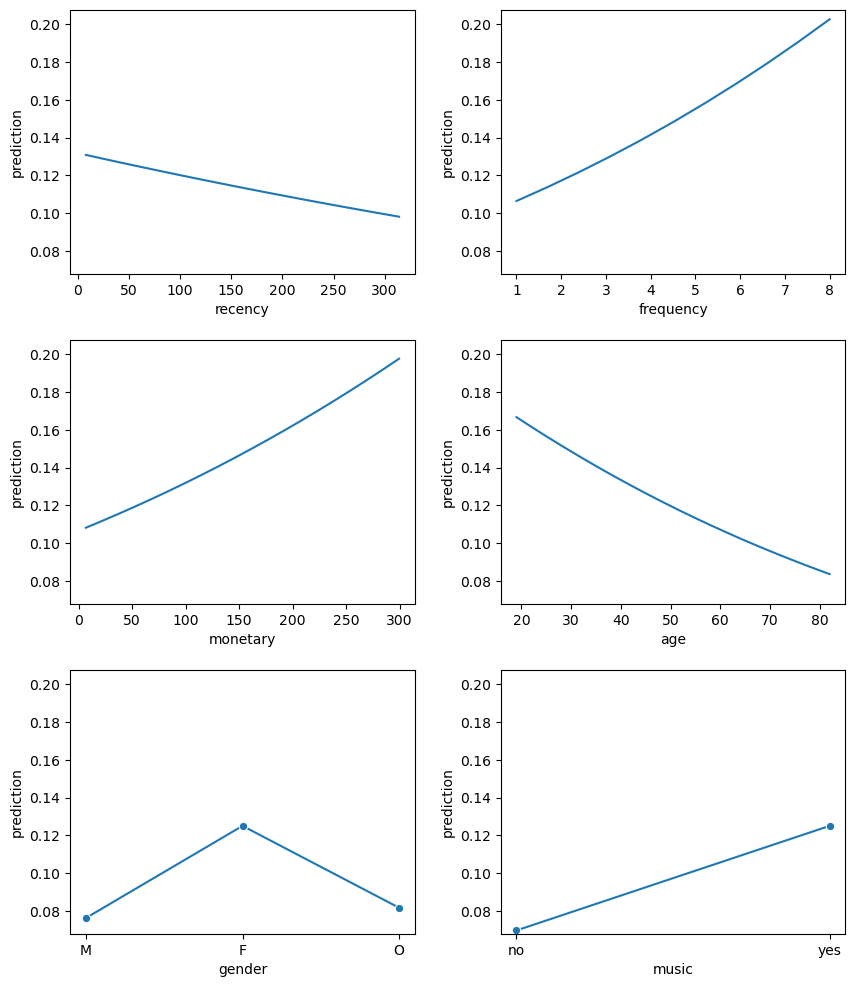

In [307]:
clf.plot("pred")

•	Frequency, monetary, and music have a **positive** effect, where higher values increase the probability of purchase.

•	Recency and age have a **negative** effect, where higher values decrease the probability of purchase.

•	Gender shows that females are the most likely group to purchase, followed by “other,” with males being the least likely.

These results align with common marketing principles: recent, frequent, and high-spending customers who are aligned with the product’s target demographic (younger, female, and music-loving) are the most likely to purchase.

### Question 5

Use Permutation Importance to assess variable importance. Which variables seem to be most and least important in the model? Explain how Permutation Importance allows you to evaluate variable importance.

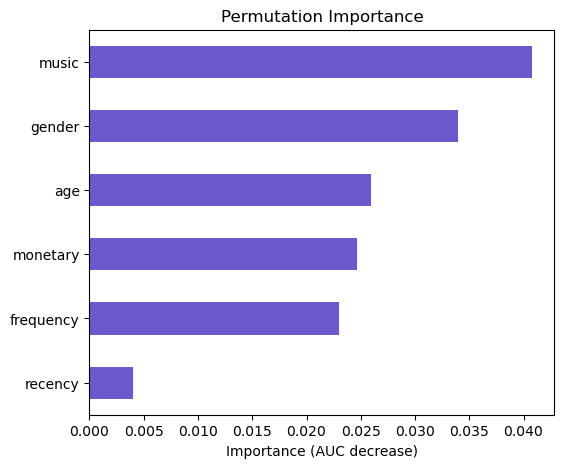

In [308]:
clf.plot("vimp") # variable importance

**Music** is the most while **recency** is the least important variable in the model. 

Permutation Importance is an intuitive and effective method for quantifying the contribution of each feature to a model’s predictions. It works by isolating each feature’s influence and measuring the impact of its absence (via shuffling) on the model’s performance.

### Question 6

Add the predicted values from the logistic regression to the "tuango" DataFrame. Use "pred_logit" as the variable name. Compare the average of the predicted values to the overall response rate (i.e., proportion of buyers). What do you notice when you do this calculation using only the data used to estimate the model? Explain.

In [309]:
tuango["pred_logit"] = clf.predict()["prediction"]
tuango["pred_logit"].head()

0    0.141318
1    0.064122
2    0.072710
3    0.088488
4    0.080623
Name: pred_logit, dtype: float64

In [310]:
average_ordersize_logit = tuango["pred_logit"].mean()
average_ordersize_logit

0.09659991341853146

In [311]:
q1

0.09661373636885402

In [312]:
clf.summary()

Logistic regression (GLM)
Data                 : tuango
Response variable    : buyer
Level                : yes
Explanatory variables: recency, frequency, monetary, age, gender, music
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

               OR     OR%  coefficient  std.error  z.value p.value     
Intercept   0.051  -94.9%        -2.98      0.097  -30.768  < .001  ***
gender[F]   1.731   73.1%         0.55      0.054   10.073  < .001  ***
gender[O]   1.078    7.8%         0.07      0.128    0.584   0.559     
music[yes]  1.908   90.8%         0.65      0.059   10.912  < .001  ***
recency     0.999   -0.1%        -0.00      0.000   -3.292  < .001  ***
frequency   1.114   11.4%         0.11      0.010   10.861  < .001  ***
monetary    1.002    0.2%         0.00      0.000   12.499  < .001  ***
age         0.988   -1.2%        -0.01      0.001   -9.115  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squar

The weak performance of the model is a key reason it cannot explain much variance in the data. The ***Pseudo R-squared (McFadden): 0.046*** confirms that the model explains only 4.6% of the variance in the response variable, ***which is quite low***.

•	An AUC of 0.657 indicates that the model’s ability to distinguish buyers from non-buyers is moderate at best. This suggests that the explanatory variables do not strongly predict purchase behavior.

•	Some predictors have statistically significant effects, but their magnitude is small, meaning they contribute little to explaining purchase likelihood

•	The model may be missing key variables (e.g., customer preferences, product-specific factors) that could better explain buyer behavior.

•	If the proportion of buyers (buyer == yes) is small, logistic regression may struggle to capture variability due to the dominance of non-buyers in the data.

### Question 7

Estimate a linear regression model using "ordersize" as the response variable and recency, frequency, monetary, age, gender, and music as the explanatory variables. Estimate this regression ***using only those customers who placed an order after the deal offer message***. Describe why you think it does, or does not, make sense to focus on this group of customers

In [313]:
tuango_buyer = tuango[tuango["buyer"] == "yes"]

In [314]:
tuango_buyer.head()

,userid,buyer,ordersize,recency,frequency,monetary,age,gender,music,training,test,buyer_yes,pred_logit
8,U79932394,yes,4.0,212,1.0,19.900000,59,F,yes,1.0,1,1,0.070039
14,U73924857,yes,5.0,177,10.0,40.000000,41,F,yes,1.0,1,1,0.213864
29,U74007327,yes,5.0,107,1.0,72.000000,26,O,yes,0.0,1,1,0.082310
34,U17047572,yes,3.0,101,4.0,70.000000,56,F,yes,0.0,1,1,0.120792
49,U67414450,yes,4.0,50,1.0,65.599998,20,F,yes,1.0,1,1,0.139709


In [315]:
reg = rsm.model.regress(data={"tuango_buyer": tuango_buyer}, rvar="ordersize", evar=[
        "recency",
        "frequency",
        "monetary",
        "age",
        "gender",
        "music",
    ])
reg.summary()

Linear regression (OLS)
Data                 : tuango_buyer
Response variable    : ordersize
Explanatory variables: recency, frequency, monetary, age, gender, music
Null hyp.: the effect of x on ordersize is zero
Alt. hyp.: the effect of x on ordersize is not zero

            coefficient  std.error  t.value p.value     
Intercept         3.665      0.174   21.104  < .001  ***
gender[F]         0.126      0.089    1.425   0.154     
gender[O]         0.259      0.208    1.243   0.214     
music[yes]        0.025      0.097    0.255   0.799     
recency           0.000      0.001    0.591   0.555     
frequency         0.023      0.016    1.456   0.145     
monetary          0.000      0.000    1.035   0.301     
age               0.001      0.003    0.389   0.697     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.003, Adjusted R-squared: -0.0
F-statistic: 0.939 df(7, 2012), p.value 0.475
Nr obs: 2,020


Focusing only on buyers ***does not make sense*** because:

1.	Selection Bias: Excludes non-buyers, making the results unrepresentative of the broader customer base.

2.	Weak Model Performance: The model explains only 0.3% of the variance in ordersize ***(R-squared = 0.003)*** and has no significant predictors.
    
3.	Missed Insights: Ignores why some customers did not purchase, which is crucial for improving targeting strategies.

It only makes sense if the goal is to study differences in purchase volume among buyers, not overall customer behavior.

### Question 8

Use Permutation Importance to assess variable importance. Which variables seem to be most important in the model?

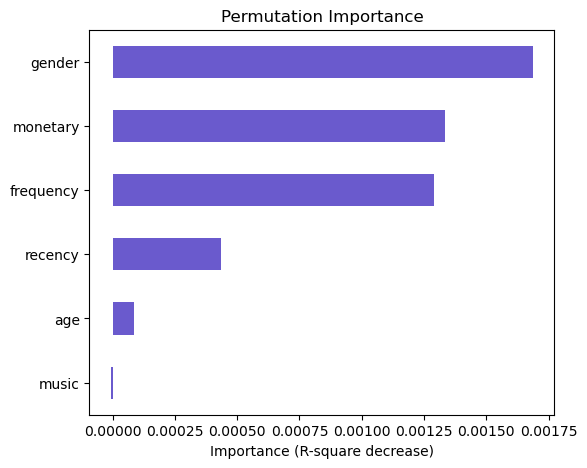

In [316]:
reg.plot("vimp") # variable importance

**Gender** is the most while **music** is the least important variable in the model

### Question 9

What do the linear regression model results suggest about our ability to predict ordersize for customers who responded to the deal?

The linear regression model results suggest that the model performs ***very poorly*** in predicting ordersize (number of sessions purchased) for customers who responded to the deal.

•	R-squared = 0.003, so the model explains only ***0.3% of the variance*** in ordersize, which is ***negligible***.

•	None of the predictors are statistically significant (***p > 0.05*** for all)

### Question 10

Add the predicted values from the linear regression to the "tuango" data.frame. Compare the average of the predicted values to the average value of ordersize. Make sure to focus only on buyers. What do you notice?

In [317]:
tuango_buyer["pred_linear"] = reg.predict()["prediction"]
tuango_buyer["pred_linear"].head()

/tmp/ipykernel_75510/2564032090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuango_buyer["pred_linear"] = reg.predict()["prediction"]


8     3.974319
14    4.153051
29    4.046473
34    4.015176
49    3.888904
Name: pred_linear, dtype: float64

In [318]:
tuango_buyer["pred_linear"].mean()

3.941089108910902

In [319]:
q2.loc["yes", ("mean", "ordersize")]

3.9410891089108913

The average of the predicted values is ***almost identical*** to the average of the actual ordersize values for buyers.

1.	Weak Model Performance:

•	The model explains only ***0.3%*** of the variance in ordersize (R-squared = 0.003). The predictors have ***almost no effect***, so the model essentially predicts the mean value of ordersize for all buyers, regardless of the inputs.

2.	Linear Regression Tendency:

•	Linear regression minimizes the sum of squared errors, so when the predictors lack explanatory power, the model defaults to predicting the mean of the response variable (ordersize) for all observations.

3.	Lack of Predictive Power:

•	Since none of the predictors significantly impact ordersize, the model doesn’t provide individualized predictions. It just replicates the overall mean, leading to nearly identical averages.

## Part III: Profitability Analysis

The following questions focus on the profit and return on marketing expenditures from offering the deal to (some of) the remaining 397,252 potential customers in Hangzhou (i.e., 418,160 – 20,908).

To calculate profit and return on marketing expenditures assume the following:
- Price per 30-minute session is 49 RMB
- Marginal cost of sending a deal offer message is 9 RMB
- Tuango’s fee on each deal sold is 50% of sales revenues

### Question 11

What is the breakeven response rate? Use the average ordersize from question 2 in your revenue calculations.

In [320]:
# state your assumptions that are relevant to calculate
# the breakeven response rate
# breakeven should be of type `float`
margin = 49 # float
cost = 9 # float
average_ordersize = q2.loc["yes", ("mean", "ordersize")]
breakeven = cost / (0.5 * margin * average_ordersize) # float, do not apply rounding, do not express as a percentage
q11 = breakeven # float, DO NOT APPLY ROUNDING, do not express as a percentage
q11

0.09320949834524941

### Question 12

What is the projected profit in RMB and the return on marketing expenditures if you offer the deal to all 397,252 remaining customers (i.e., target everyone)?

In [321]:
ncust = tuango.groupby("buyer", observed=False).buyer.agg("count")
response = pd.DataFrame(
    {
        "n_obs": ncust,
        "perc": ncust.agg(lambda x: (x / x.sum())),
    }
)
response

,n_obs,perc
buyer,,
yes,2020,0.096614
no,18888,0.903386


In [322]:
# insert calculation code here
# all variables should be numeric (integer or float) and of length 1
# _all stands for 'targeting all'
tuango["message_all"] = True

nr_message_all = 397252
message_cost_all = nr_message_all * cost
nr_responses_all = nr_message_all * response.loc['yes', 'perc']
response_rate_all = response.loc['yes', 'perc']
revenue_all = nr_responses_all * average_ordersize * margin
profit_all = (0.5 * revenue_all) - message_cost_all
ROME_all = profit_all / message_cost_all

nr_message_all, message_cost_all, nr_responses_all, response_rate_all, revenue_all, profit_all, ROME_all

(397252,
 3575268,
 38380.0,
 0.09661373636885402,
 7411691.0,
 130577.5,
 0.036522436919414154)

### Question 13

Evaluate the performance implications of offering the deal to only those customers (out of 397,252) with a predicted probability of purchase greater than the breakeven response rate. Determine the projected profit in RMB and the return on marketing expenditures for both approaches. (6 points)

Note: Fine tune your estimate from Q2 above by determining the average amount spent among the people that (1) will receive a message and (2) bought a karaoke deal. Also, use the actual number of messages you plan to send out to the group of customers in the rollout sample (i.e., “test == 0”)

In [323]:
tuango.head()

,userid,buyer,ordersize,recency,frequency,monetary,age,gender,music,training,test,buyer_yes,pred_logit,message_all
0,U15889344,no,0.0,309,7.0,39.799999,44,F,yes,0.0,1,0,0.141318,True
1,U60246497,no,0.0,297,8.0,39.799999,80,M,yes,1.0,1,0,0.064122,True
2,U22965759,no,0.0,295,1.0,72.900002,59,F,yes,1.0,1,0,0.072710,True
3,U40811142,no,0.0,277,1.0,40.000000,37,F,yes,0.0,1,0,0.088488,True
4,U76283952,no,0.0,259,1.0,21.000000,43,F,yes,1.0,1,0,0.080623,True


In [324]:
tuango["message_logit"] = (tuango["pred_logit"] > q11) & (tuango["test"] == 0)
ncust_exact = tuango.groupby("message_logit", observed=False).message_logit.agg("count")
response_exact = pd.DataFrame(
    {
        "n_obs": ncust_exact,
        "perc": ncust_exact.agg(lambda x: (x / x.sum())),
    }
)
response_exact

,n_obs,perc
message_logit,,
False,244034,0.58359
True,174126,0.41641


In [325]:
tuango.head()

,userid,buyer,ordersize,recency,frequency,monetary,age,gender,music,training,test,buyer_yes,pred_logit,message_all,message_logit
0,U15889344,no,0.0,309,7.0,39.799999,44,F,yes,0.0,1,0,0.141318,True,False
1,U60246497,no,0.0,297,8.0,39.799999,80,M,yes,1.0,1,0,0.064122,True,False
2,U22965759,no,0.0,295,1.0,72.900002,59,F,yes,1.0,1,0,0.072710,True,False
3,U40811142,no,0.0,277,1.0,40.000000,37,F,yes,0.0,1,0,0.088488,True,False
4,U76283952,no,0.0,259,1.0,21.000000,43,F,yes,1.0,1,0,0.080623,True,False


In [326]:
nr_message_logit = response_exact.loc[True, "n_obs"]
message_cost_logit = nr_message_logit * cost
nr_responses_logit = (tuango["pred_logit"] * tuango["message_logit"]).sum()
response_rate_logit = nr_responses_logit / nr_message_logit
revenue_logit = nr_responses_logit * average_ordersize * margin
profit_logit = 0.5 * revenue_logit - message_cost_logit
ROME_logit = profit_logit / message_cost_logit


nr_message_logit, message_cost_logit, nr_responses_logit, response_rate_logit, revenue_logit, profit_logit, ROME_logit

(174126,
 1567134,
 24441.801355587937,
 0.14036847659504,
 4720038.539108883,
 792885.2695544413,
 0.5059460579340639)

### Question 14

Create a bar chart with profit information for the analyses conducted in questions 12 and 13

In [327]:
performance_data = pd.DataFrame(
    {
        "name": ["Targeting All", "Logistic"],
        "Profit": [profit_all, profit_logit],
        "ROME": [ROME_all, ROME_logit],
    }
)

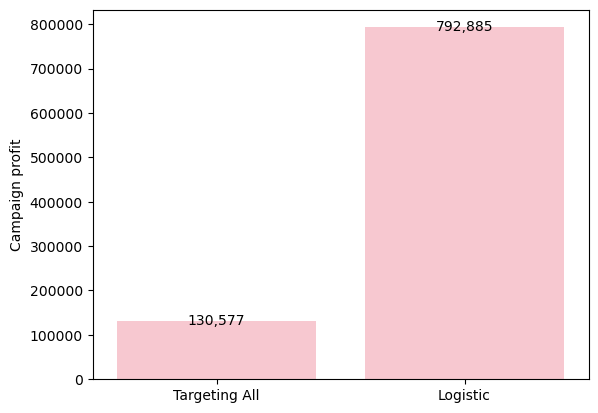

In [328]:
plt.clf()
fig = sns.barplot(x="name", y="Profit", color="pink", data=performance_data)
fig.set(xlabel="", ylabel="Campaign profit")
for index, row in performance_data.iterrows():
    fig.text(row.name, row.Profit - 8000, f"{int(row.Profit):,}", color="black", ha="center")
plt.show()

### Question 15

Create a bar chart with ROME for the analyses conducted in questions 12 and 13

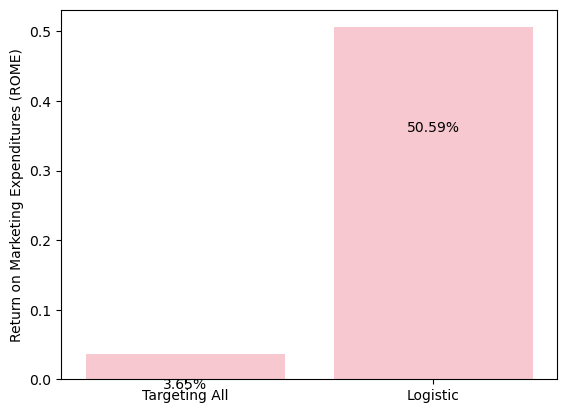

In [329]:
plt.clf()
fig = sns.barplot(x="name", y="ROME", color="pink", data=performance_data)
fig.set(xlabel="", ylabel="Return on Marketing Expenditures (ROME)")
for index, row in performance_data.iterrows():
    adj = rsm.ifelse(index == 0, 0.05, 0.15)
    fig.text(
        row.name,
        row.ROME - adj,
        f"{round((100*row.ROME), 2):,}%",
        color="black",
        ha="center",
    )
plt.show()

### Question 16

You also have access to a dataset with the results from the deal offer roll-out (tuango_post.parquet). Tuango decided to contact all remaining 397,252 customers because this would provide data that could be used to evaluate different targeting approaches. The data has a "test" variable (test = 1 for the data used in the test, test = 0 for the remaining customers). Use this variable to evaluate the actual performance on the 'roll out' sample for the targeting approaches from questions 12 and 13. Also re-create the plots from question 14 and 15 based on this new dataset.

Specifically, redo questions 12-15 using the tuango-post.parquet date and make the required code adjustments to calculate the actual performance on the 'roll out' sample correctly.

Hint 1: It is important that you do NOT use any information about buyers that were in the 'roll out' sample (i.e., test == 0) when calculating the break-even response rate etc. for targeting.

Hint 2: You have the actual data on what happened in the "post" data. Use that information to calculate performance (i.e., do not "project" the performance like you had to do for questions 12 and 13).

In [330]:
tuango_post = pd.read_parquet("data/tuango_post.parquet")

In [331]:
# insert calculation code here
# the result should be expressed as a proportion/decimal
# assign the calculated number to "q1"
# there is no need to round the result

total_responses = tuango_post["buyer"].notna().sum()

# Number of "yes" responses
yes_responses = (tuango_post["buyer"] == "yes").sum()

# Proportion of buyers
q1_post = yes_responses / total_responses

# The result is stored in q1
q1_post

0.09621915056437727

In [332]:
# insert calculation code here to create a pd.pivot_table that shows
# (1) counts the number of yes and no (buyer), (2) the mean (ordersize), and
# (3) the standard deviation in ordersize for yes and no responses
q2_post = tuango_post.pivot_table(index='buyer', values='ordersize', aggfunc=['count', 'mean', 'std'], observed=True)
# the below should show your result
# do not apply any rounding to your answer
print(q2_post.loc["yes", "mean"])
q2_post

ordersize    3.938114
Name: yes, dtype: float64


,count,mean,std
,ordersize,ordersize,ordersize
buyer,,,
yes,40235,3.938114,1.697232
no,377925,0.000000,0.000000


In [333]:
clf_post = rsm.model.logistic(
    data={"tuango_post": tuango_post},
    rvar="buyer",
    lev="yes",
    evar=[
        "recency",
        "frequency",
        "monetary",
        "age",
        "gender",
        "music",
    ],
)
clf_post.summary()

Logistic regression (GLM)
Data                 : tuango_post
Response variable    : buyer
Level                : yes
Explanatory variables: recency, frequency, monetary, age, gender, music
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

               OR     OR%  coefficient  std.error  z.value p.value     
Intercept   0.050  -95.0%        -2.99      0.022 -138.153  < .001  ***
gender[F]   1.759   75.9%         0.56      0.012   46.145  < .001  ***
gender[O]   1.071    7.1%         0.07      0.029    2.373   0.018    *
music[yes]  1.879   87.9%         0.63      0.013   47.753  < .001  ***
recency     0.999   -0.1%        -0.00      0.000  -14.782  < .001  ***
frequency   1.121   12.1%         0.11      0.002   51.307  < .001  ***
monetary    1.002    0.2%         0.00      0.000   57.229  < .001  ***
age         0.987   -1.3%        -0.01      0.000  -41.380  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-

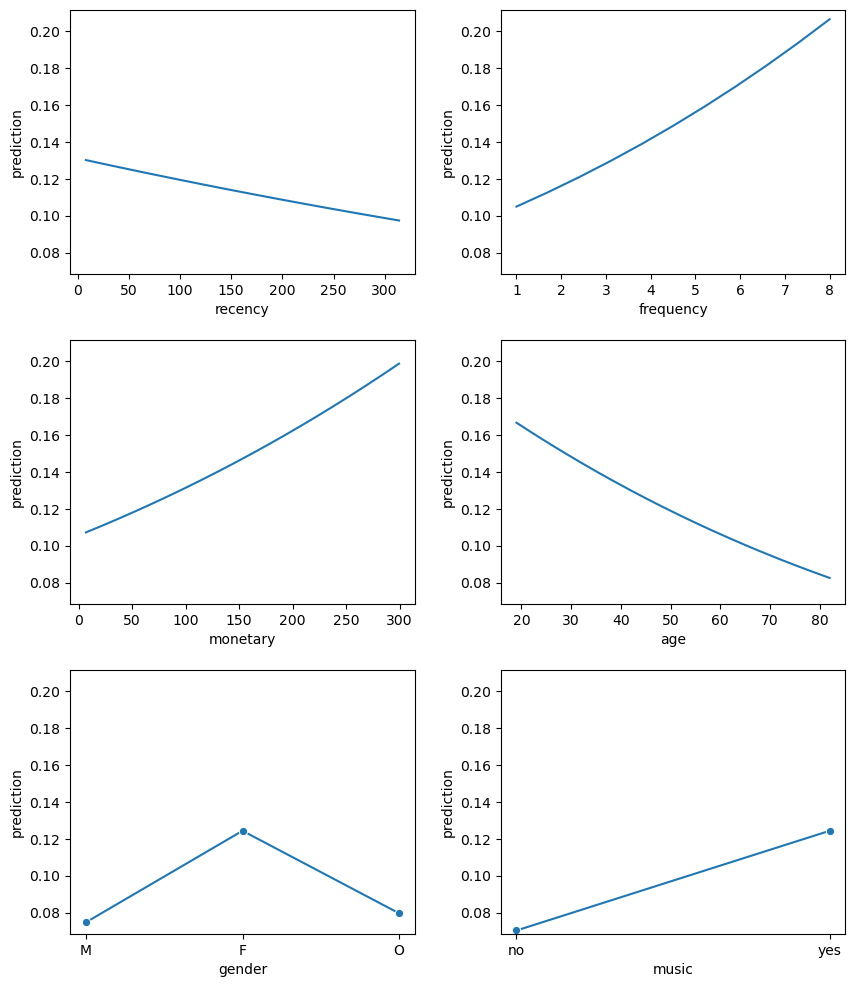

In [334]:
clf_post.plot("pred")

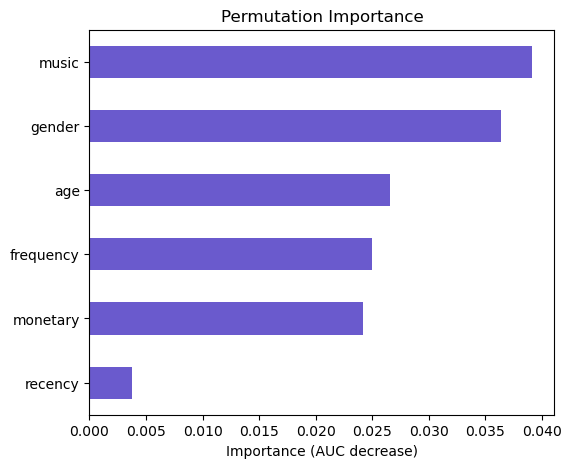

In [335]:
clf_post.plot("vimp") # variable importance

In [336]:
tuango_post["pred_logit_post"] = clf_post.predict()["prediction"]
tuango_post["pred_logit_post"].head()

0    0.143066
1    0.063879
2    0.071288
3    0.087050
4    0.079130
Name: pred_logit_post, dtype: float64

In [337]:
average_ordersize_logit_post = tuango_post["pred_logit_post"].mean()
average_ordersize_logit_post

0.09621915056438622

In [338]:
q1_post

0.09621915056437727

In [339]:
average_ordersize_post = q2_post.loc["yes", ("mean", "ordersize")]

In [340]:
ncust_post = tuango_post.groupby("buyer", observed=False).buyer.agg("count")
response_post = pd.DataFrame(
    {
        "n_obs": ncust_post,
        "perc": ncust_post.agg(lambda x: (x / x.sum())),
    }
)
response_post

,n_obs,perc
buyer,,
yes,40235,0.096219
no,377925,0.903781


### Question 12 (post)

What is the projected profit in RMB and the return on marketing expenditures if you offer the deal to all 397,252 remaining customers (i.e., target everyone)?

In [341]:
# insert calculation code here
# all variables should be numeric (integer or float) and of length 1
# _all stands for 'targeting all'
tuango_post["message_all"] = True

nr_message_all_post = 397252
message_cost_all_post = nr_message_all_post * cost
nr_responses_all_post = nr_message_all * response_post.loc['yes', 'perc']
response_rate_all_post = response_post.loc['yes', 'perc']
revenue_all_post = nr_responses_all_post * average_ordersize_post * margin
profit_all_post = (0.5 * revenue_all_post) - message_cost_all_post
ROME_all_post = profit_all_post / message_cost_all_post

nr_message_all_post, message_cost_all_post, nr_responses_all_post, response_rate_all_post, revenue_all_post, profit_all_post, ROME_all_post

(397252,
 3575268,
 38223.25,
 0.09621915056437727,
 7375847.5,
 112655.75,
 0.03150973577365389)

### Question 13 (post)

Evaluate the performance implications of offering the deal to only those customers (out of 397,252) with a predicted probability of purchase greater than the breakeven response rate. Determine the projected profit in RMB and the return on marketing expenditures for both approaches. (6 points)

Note: Fine tune your estimate from Q2 above by determining the average amount spent among the people that (1) will receive a message and (2) bought a karaoke deal. Also, use the actual number of messages you plan to send out to the group of customers in the rollout sample (i.e., “test == 0”)

In [342]:
tuango_post["message_logit_post"] = tuango_post["pred_logit_post"] > q11
ncust_exact_post = tuango_post.groupby("message_logit_post", observed=False).message_logit_post.agg("count")
response_exact_post = pd.DataFrame(
    {
        "n_obs": ncust_exact_post,
        "perc": ncust_exact_post.agg(lambda x: (x / x.sum())),
    }
)
response_exact_post

,n_obs,perc
message_logit_post,,
False,237984,0.569122
True,180176,0.430878


In [343]:
nr_message_logit_post = response_exact_post.loc[True, 'n_obs']
message_cost_logit_post = nr_message_logit_post * cost
nr_responses_logit_post = (tuango_post["pred_logit_post"] * tuango_post["message_logit_post"]).sum()
response_rate_logit_post = nr_responses_logit_post / nr_message_logit_post
revenue_logit_post = nr_responses_logit_post * average_ordersize_post * margin
profit_logit_post = 0.5 * revenue_logit_post - message_cost_logit_post
ROME_logit_post = profit_logit_post / message_cost_logit_post


nr_message_logit_post, message_cost_logit_post, nr_responses_logit_post, response_rate_logit_post, revenue_logit_post, profit_logit_post, ROME_logit_post

(180176,
 1621584,
 25474.517871054217,
 0.14138685435937204,
 4915755.697197924,
 836293.8485989622,
 0.515726504824272)

### Question 14 (post)

Create a bar chart with profit information for the analyses conducted in questions 12 and 13

In [344]:
performance_data_post = pd.DataFrame(
    {
        "name": ["Targeting All", "Logistic"],
        "Profit": [profit_all_post, profit_logit_post],
        "ROME": [ROME_all_post, ROME_logit_post],
    }
)

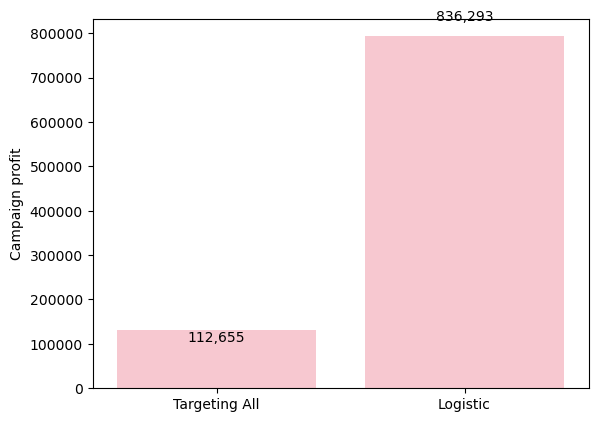

In [345]:
plt.clf()
fig = sns.barplot(x="name", y="Profit", color="pink", data=performance_data)
fig.set(xlabel="", ylabel="Campaign profit")
for index, row in performance_data_post.iterrows():
    fig.text(row.name, row.Profit - 8000, f"{int(row.Profit):,}", color="black", ha="center")
plt.show()

### Question 15 (post)

Create a bar chart with ROME information for the analyses conducted in questions 12 and 13

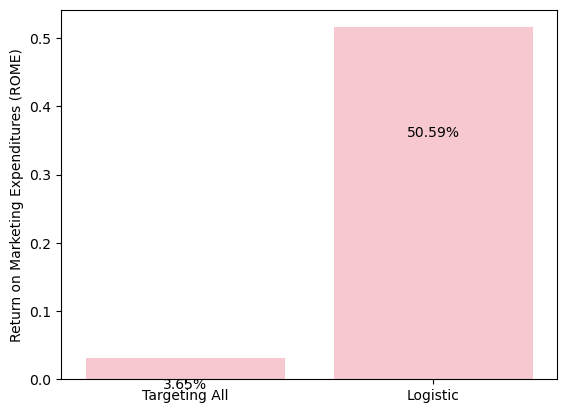

In [346]:
plt.clf()
fig = sns.barplot(x="name", y="ROME", color="pink", data=performance_data_post)
fig.set(xlabel="", ylabel="Return on Marketing Expenditures (ROME)")
for index, row in performance_data.iterrows():
    adj = rsm.ifelse(index == 0, 0.05, 0.15)
    fig.text(
        row.name,
        row.ROME - adj,
        f"{round((100*row.ROME), 2):,}%",
        color="black",
        ha="center",
    )
plt.show()

### Question 17

Please describe how you used Generative AI-tools like ChatGPT to support your work on this assignment and enhance your learning. Create a pdf where you organize your interactions with AI and comment on what things did and did not go well. Bring any questions you may have about the assignment and the support you received from GenAI to class so we can discuss.

Make sure to include:
- Specific examples of prompts you used
- How the AI responses helped or hindered your understanding
- Any limitations or challenges you encountered
- Key insights gained from using GenAI tools
- Questions that arose during your interactions with AI
- How GenAI complemented your learning process

Note: No matter how you used Generative AI-tools, you will be expected to understand and talk meaningfully about the work you submitted for this assignment. You may be called on in class to walk us through your thought process, calculations, and how different parts of your code work.


https://chatgpt.com/share/e/6792813c-8818-8013-a018-7c6983ffeaf5